In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Load the Air Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True)
df

<ipython-input-2-b6fc6cbd628a>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True)


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [3]:
# Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

In [4]:
# Fit the ARIMA model
order = (5, 1, 0)  # You can adjust the order parameter
model = ARIMA(train, order=order)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [5]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))

In [6]:
# Evaluate the model using RMSE and MAE
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

In [7]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 80.66394528577948
Mean Absolute Error (MAE): 67.3835005901074


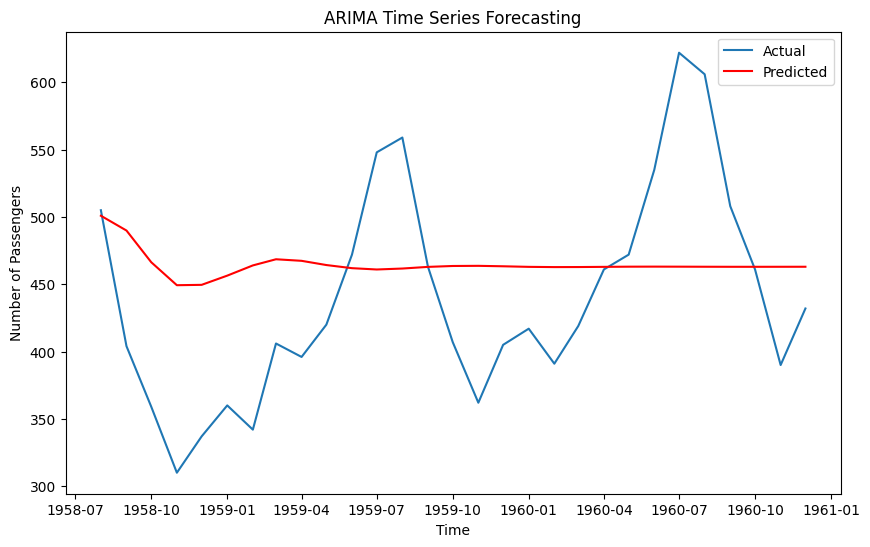

In [8]:
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()